### Case Study : Recommendation on Smart Phones
CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice. • DATA DESCRIPTION: • author : name of the person who gave the rating • country : country the person who gave the rating belongs to • data : date of the rating • domain: website from which the rating was taken from • extract: rating content • language: language in which the rating was given • product: name of the product/mobile phone for which the rating was given • score: average rating for the phone • score_max: highest rating given for the phone • source: source from where the rating was taken

### PROJECT OBJECTIVE: 
we will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively

### • DATA DESCRIPTION:

• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

##### Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps

In [124]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor,Reader,Dataset
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from collections import defaultdict
sns.set(rc={'figure.figsize':(14,8)})
import matplotlib.style as style
style.use('fivethirtyeight')
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

##### Merge the provided CSVs into one data-frame

In [2]:
df1 = pd.read_csv('phone_user_review_file_1.csv', encoding='latin1')
df2 = pd.read_csv('phone_user_review_file_2.csv', encoding='latin1')
df3 = pd.read_csv('phone_user_review_file_3.csv', encoding='latin1')
df4 = pd.read_csv('phone_user_review_file_4.csv', encoding='latin1')
df5 = pd.read_csv('phone_user_review_file_5.csv', encoding='latin1')
df6 = pd.read_csv('phone_user_review_file_6.csv', encoding='latin1') 

##### Check a few observations and shape of the data-frame.

In [3]:
display(df1.head(),df2.head(),df3.head(),df4.head(),df5.head(),df6.head())

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


##### Check a few observations and shape of the data-frame

In [4]:
display(df1.shape,df2.shape,df3.shape,df4.shape,df5.shape,df6.shape)

(374910, 11)

(114925, 11)

(312961, 11)

(98284, 11)

(350216, 11)

(163837, 11)

##### Merge the provided CSVs into one data-frame.

In [5]:
df=df1.append([df2,df3,df4,df5,df6])

In [6]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [7]:
df.shape

(1415133, 11)

##### After Merging all the datasets we have 1415133 rows and 11 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


##### Round off scores to the nearest integers

In [9]:
df['score']=df['score'].apply(np.round)
round(df['score'].mean())

8

##### Check for missing values. Impute the missing values if there is any.

In [10]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [11]:
df['author'].fillna(df['author'].mode()[0],inplace=True)
df['extract'].fillna(df['extract'].mode()[0],inplace=True)
df['score'].fillna(np.round(df['score'].mean()),inplace=True)
df['product'].fillna(df['product'].mode()[0],inplace=True)

##### Since score_max has no use since we already have score. we will be dropping score_max feature from the dataset 

In [12]:
df.drop('score_max',axis=1,inplace=True)

In [13]:
df.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
extract      0
author       0
product      0
dtype: int64

### EDA

Text(0.5, 1.0, 'Rating Count')

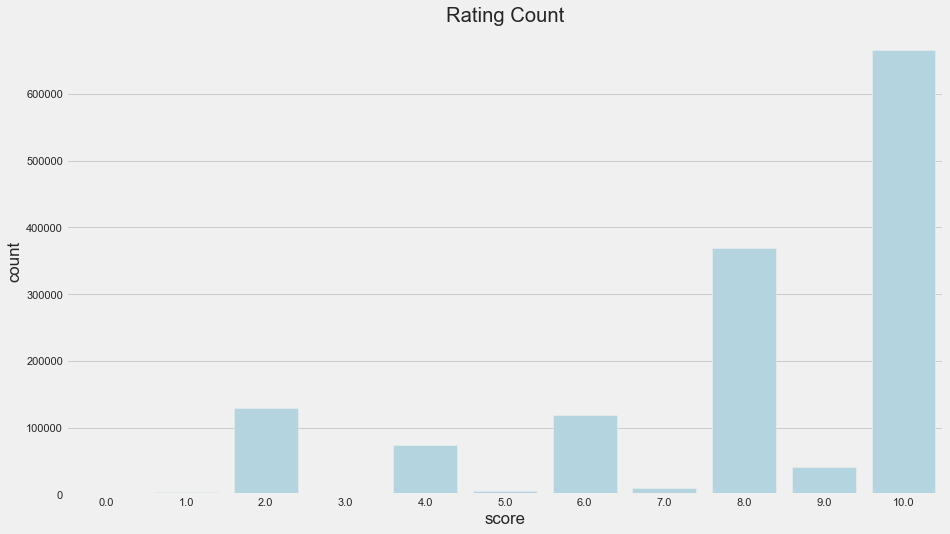

In [14]:
sns.countplot('score',data=df,color='LightBlue')
plt.title('Rating Count')

In [ ]:
Almost 600000 of them have given the rating as 10 and the second most rating was 8 which is about 350000+ of them 

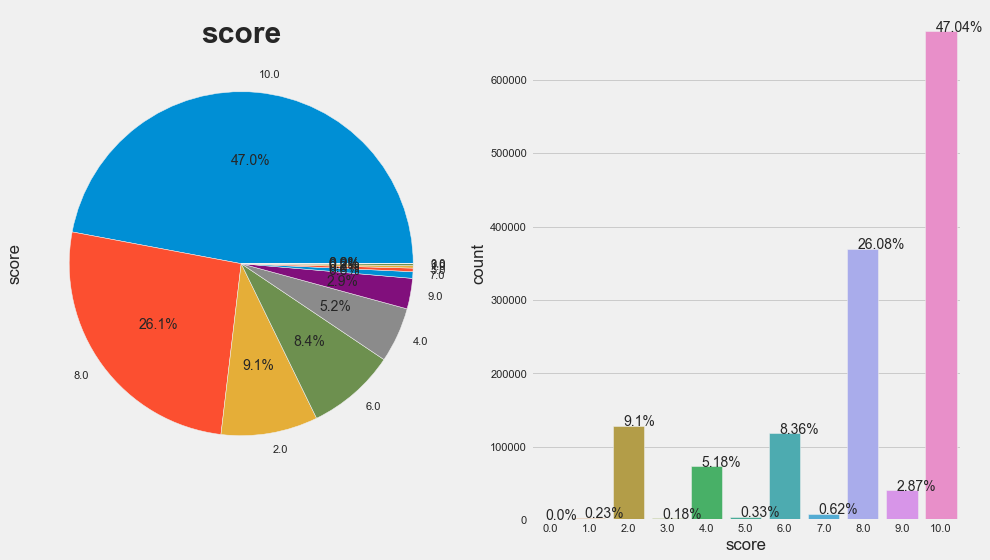

In [15]:
plt.subplot(121)
df['score'].value_counts().plot(kind='pie',autopct='%1.1f%%').set_title('score',fontweight='bold',fontsize=30)
plt.subplot(122)
t=sns.countplot(df['score'])
for i in t.patches:
    txt=str(((i.get_height()/len(df['score']))*100).round(2))+ '%'
    txt_x=i.get_x()+i.get_width()/3
    txt_y=i.get_height()
    t.text(txt_x,txt_y,txt)
plt.tight_layout()

In [17]:
df['date']=pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

<AxesSubplot:xlabel='year', ylabel='count'>

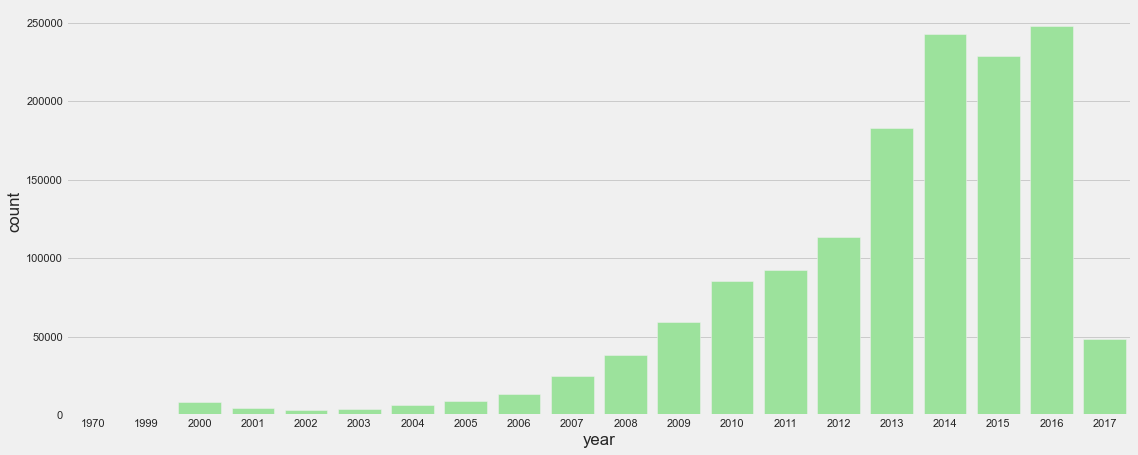

In [18]:
plt.figure(figsize=(17,7))
sns.countplot('year',data=df,color='LightGreen')

Text(0.5, 1.0, 'Score Count')

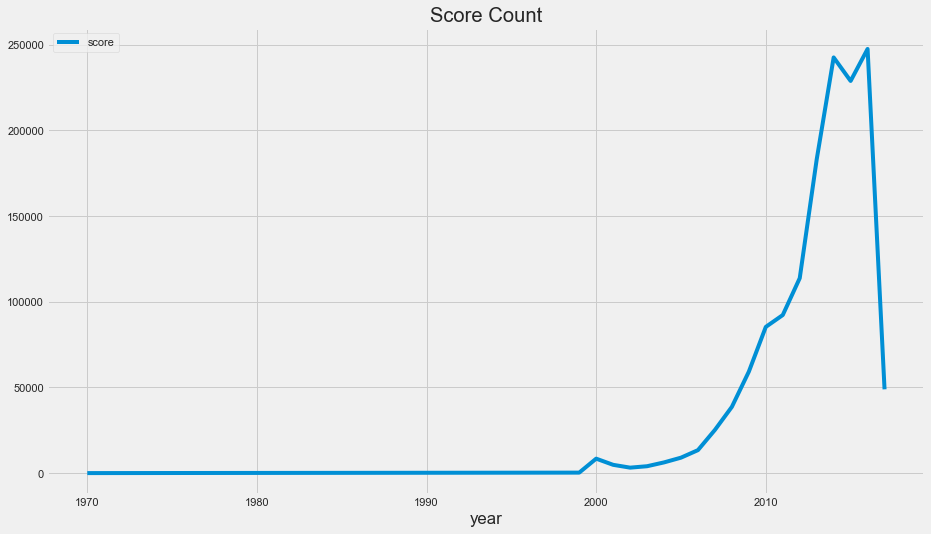

In [19]:
df[['year','score']].groupby('year').count().plot()
plt.title('Score Count')

<AxesSubplot:xlabel='month'>

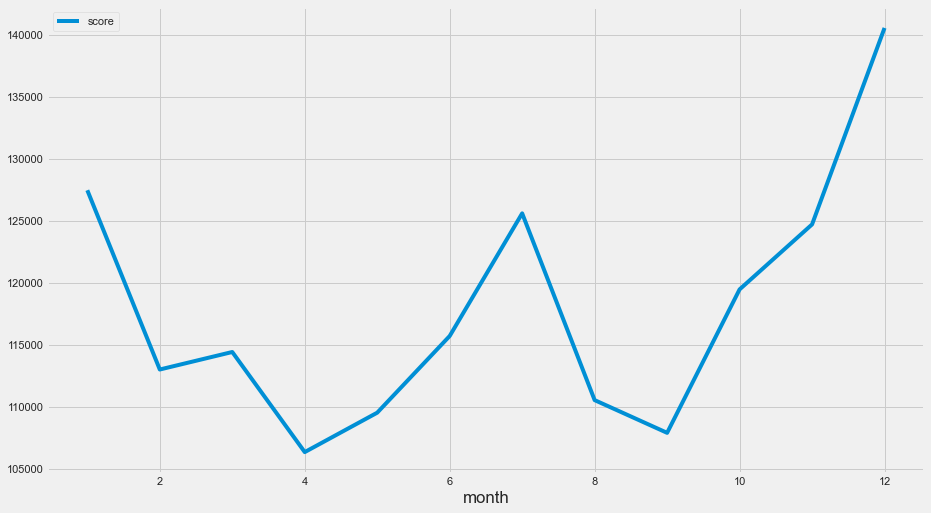

In [20]:
df[['month','score']].groupby('month').count().plot()

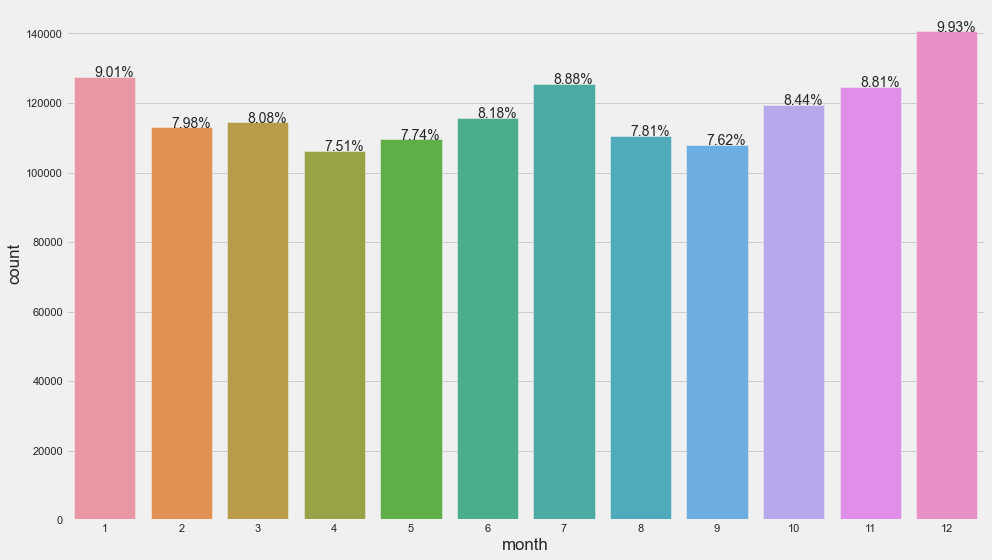

In [21]:
t=sns.countplot(df['month'])
for i in t.patches:
    txt=str(((i.get_height()/len(df['month']))*100).round(2))+ '%'
    txt_x=i.get_x()+i.get_width()/3
    txt_y=i.get_height()
    t.text(txt_x,txt_y,txt)
plt.tight_layout()

##### Drop irrelevant features. Keep features like Author, Product, and Score.

In [23]:
df.drop(['extract','domain','phone_url','date','lang','country','source','domain','year','month'],axis=1,inplace=True)

In [24]:
df.shape

(1415133, 3)

##### Check for duplicate values and remove them if there is any

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(1227419, 3)

In [27]:
df_sample=df.sample(n =1000000,random_state=612)

In [28]:
df_sample.shape

(1000000, 3)

##### Answer the following questions
• Identify the most rated features.

In [29]:
df_sample['product'].value_counts()[:11]

OnePlus 3 (Graphite, 64 GB)               1811
Lenovo Vibe K4 Note (White,16GB)          1737
Nokia N95                                 1496
Lenovo Vibe K4 Note (Black, 16GB)         1469
Samsung Galaxy J3 (8GB)                   1465
OnePlus 3 (Soft Gold, 64 GB)              1451
Samsung Galaxy S7 edge 32GB (Verizon)     1413
Nokia 5800 XpressMusic                    1378
Samsung Galaxy S6 zwart / 32 GB           1318
Samsung Galaxy S7 edge 32GB (T-Mobile)    1313
Samsung Galaxy S7 32GB (Verizon)          1257
Name: product, dtype: int64

##### The most rated product among all is OnePlus  with 1811 reviews

In [30]:
pd.value_counts(df_sample['author'])[:11]

Amazon Customer    24341
Cliente Amazon      5208
Client d'Amazon     2198
Amazon Kunde        1632
Anonymous           1572
David                759
Alex                 656
Daniel               566
Marco                557
Andrea               543
Chris                538
Name: author, dtype: int64

##### Amazon Customer has the given the highest number of reviews which is the twice the Cliente Amazon at the second highest 

In [31]:
counts=df_sample['product'].value_counts()
df_sample=df_sample[(df_sample['product'].isin(counts[counts>50].index))]
df_sample['product'].value_counts(ascending=True)[:5] 

Samsung Nexus S GT-I9023                                                                                                                                 51
Samsung GT-B2100 TÃ©lÃ©phone portable Photo 1,3 Mpix mp3 Radio FM Carte microSD Bluetooth Rouge                                                          51
LG Electronics P710 Optimus L7 II Smartphone (10,9 cm (4,3 Zoll) Touchscreen, 1GHz, Dual-Core, 4GB, 768MB RAM, 8-Megapixel-Kamera, Android 4.1) weiÃ    51
Nokia Lumia 735 Smartphone, 8 GB, Verde [Italia]                                                                                                         51
Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold)                                                                                                  51
Name: product, dtype: int64

In [32]:
counts=df_sample['author'].value_counts()
df_sample=df_sample[(df_sample['author'].isin(counts[counts>50].index))]
df_sample['author'].value_counts(ascending=True)[:5]

Domenico        51
Ricardo         51
Massimiliano    51
Jim             51
giovanni        51
Name: author, dtype: int64

In [33]:
df_sample.shape

(36470, 3)

#### Popularity based recommendation systems

In [35]:
df_sample.groupby('product')['score'].mean().sort_values(ascending=False)[:10]

product
Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold                                                                                                                   10.0
Samsung Galaxy Young S6310N Smartphone (8,1 cm (3,2 Zoll) Touchscreen, Cortex A5, 1GHz, 768MB RAM, 4GB interner Speicher, 3,2 Megapixel Kamera, Android 4.1) weiÃ    10.0
Samsung SGH a777 - Cellular phone - 3G - WCDMA (UMTS) / GSM - slider - Blue - AT&T                                                                                    10.0
Samsung E2550 Handy (Social Networking Dienste, Kamera, MP3-Player) strong-black                                                                                      10.0
Sony CMD Z5                                                                                                                                                           10.0
Wiko Rainbow Smartphone Bluetooth Android 4 Go Blanc                                                                                     

##### Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold- 128 GB, Rose Gold is the most popular rated product with the score of 10.

#### Collaborative filtering model using SVD

In [36]:
df_col=df_sample[['author','product','score']]
df_col.head()

,author,product,score
89435,Amazon Customer,Apple iPhone 4 8Gb,6.0
268848,Andy,LG Optimus F6 4GB Android 4G LTE Smartphone - ...,2.0
200597,Andrew,Samsung Galaxy S4 i9505 16GB LTE Unlocked Inte...,10.0
202053,Francisco,BlackBerry 9100 Pearl 3G Unlocked Phone with 3...,10.0
140877,Client d'Amazon,"Huawei Ascend P6 Smartphone dÃ©bloquÃ© 4,7 pou...",10.0


In [53]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_col,reader = reader)

In [54]:
trainset = data.build_full_trainset()

In [55]:
algo = SVD()
algo.fit(trainset)

In [56]:
testset = trainset.build_anti_testset()

In [57]:
predictions = algo.test(testset)

In [58]:
accuracy.rmse(predictions)

RMSE: 0.7752


0.775247853172535

##### Root Mean Squared Error: 77%

##### Finding the Top predictions 

In [69]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [70]:
top_n = get_top_n(predictions, n=5)

In [73]:
top_n

defaultdict(list,
            {'Amazon Customer': [('Sim Free Samsung Galaxy S7 Mobile Phone - Black',
               8.577984226983414),
              ('Motorola Moto G 16 GB - Smartphone libre Android (pantalla 4.5", cÃ¡mara 5 Mp, 16 GB, Quad-Core 1.2 GHz), negro (importado)',
               8.561019295048931),
              ('Samsung Galaxy Note5', 8.53122209745493),
              ('Ð\x9cÐ¾Ð±Ð¸Ð»Ñ\x8cÐ½Ñ\x8bÐ¹ Ñ\x82ÐµÐ»ÐµÑ\x84Ð¾Ð½ Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK)',
               8.526877265895614),
              ('Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey',
               8.486186523332305)],
             'Andy': [("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]",
               10),
              ('Samsung E1200 Handy (3,9 cm (1,52 Zoll) Display, Dual-Band, Worterkennung) black',
               10),
         

In [74]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['Sim Free Samsung Galaxy S7 Mobile Phone - Black', 'Motorola Moto G 16 GB - Smartphone libre Android (pantalla 4.5", cÃ¡mara 5 Mp, 16 GB, Quad-Core 1.2 GHz), negro (importado)', 'Samsung Galaxy Note5', 'Ð\x9cÐ¾Ð±Ð¸Ð»Ñ\x8cÐ½Ñ\x8bÐ¹ Ñ\x82ÐµÐ»ÐµÑ\x84Ð¾Ð½ Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK)', 'Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey']
Andy ["Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 'Samsung E1200 Handy (3,9 cm (1,52 Zoll) Display, Dual-Band, Worterkennung) black', 'Nokia Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5" Unlocked GSM Windows 8MP Camera Smartphone - Black - International Version No Warranty', 'Apple iPhone 6 Gold 128GB SIM-Free Smartphone (Zertifiziert und GeneralÃ¼berholt)', 'Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla

In [75]:
df_new=df_col.copy()

###### Recommeding Top 10 products for the Unknown customers

In [78]:
df_new['est']=df_new['product'].apply(lambda x: algo.predict('avd',x).est)
df_new = df_new.sort_values(by=['est'], ascending=False)
df_new.head(10)

,author,product,score,est
147156,Paul,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146786,Simon,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146959,Tony,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146797,Richard,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146712,Chris,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146599,Claudia,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
147121,Danny,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146565,Vanessa,Sim Free Motorola Moto G 4th Generation Mobile...,8.0,9.155429
147110,Patrick,Sim Free Motorola Moto G 4th Generation Mobile...,10.0,9.155429
146951,Mike,Sim Free Motorola Moto G 4th Generation Mobile...,8.0,9.155429


##### Building Collaborative Filtering Model using KNNWithMeans.
User Based Model

In [79]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [80]:
 prediction_user_based= algo.test(testset)

In [81]:
accuracy.rmse(prediction_user_based, verbose=True)

RMSE: 1.6265


1.626477738118561

In [85]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(prediction_user_based, n=5)

In [86]:
top_n

defaultdict(list,
            {'Amazon Customer': [('Sony Mobile Xperia Z Ultra Smartphone dÃ©bloquÃ© 4G (Android 4.2 Jelly Bean) Noir',
               8.99763590680676),
              ('Nokia Lumia 735 Smartphone dÃ©bloquÃ© 4G (Ecran : 4.7 pouces - 8 Go - Windows Phone 8) Vert',
               8.99763590680676),
              ('Apple iPhone 5s 16 Go Or', 8.99763590680676),
              ('Samsung Galaxy Pocket S5300 Smartphone (7,1 cm (2,8 Zoll) Touchscreen, 2 Megapixel Kamera, Android 2.3) white',
               8.946316258712919),
              ('Sony Xperia M2 Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 8 GB Speicher, Android 4.3) schwarz',
               8.946316258712919)],
             'Andy': [('Huawei Ascend P6 Smartphone dÃ©bloquÃ© 4,7 pouces Android 4.2 Jelly Bean 8Go Bluetooth USB Blanc',
               10),
              ('Desconocido Xiaomi MI 4 - Smartphone libre Android (pantalla 5", cÃ¡mara 13 Mp, 16 GB, 3 GB RAM), blanco',
               10),
              ('LG G4, 

In [87]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['Sony Mobile Xperia Z Ultra Smartphone dÃ©bloquÃ© 4G (Android 4.2 Jelly Bean) Noir', 'Nokia Lumia 735 Smartphone dÃ©bloquÃ© 4G (Ecran : 4.7 pouces - 8 Go - Windows Phone 8) Vert', 'Apple iPhone 5s 16 Go Or', 'Samsung Galaxy Pocket S5300 Smartphone (7,1 cm (2,8 Zoll) Touchscreen, 2 Megapixel Kamera, Android 2.3) white', 'Sony Xperia M2 Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 8 GB Speicher, Android 4.3) schwarz']
Andy ['Huawei Ascend P6 Smartphone dÃ©bloquÃ© 4,7 pouces Android 4.2 Jelly Bean 8Go Bluetooth USB Blanc', 'Desconocido Xiaomi MI 4 - Smartphone libre Android (pantalla 5", cÃ¡mara 13 Mp, 16 GB, 3 GB RAM), blanco', 'LG G4, Metallic Gray 32GB (Sprint)', 'Apple iPhone 5 - 16GB Black - Sim Free Smartphone', 'Nokia C2-01 Sim Free Mobile Phone 3G - Black']
Andrew ['Desconocido Xiaomi MI 4 - Smartphone libre Android (pantalla 5", cÃ¡mara 13 Mp, 16 GB, 3 GB RAM), blanco', 'Sony Xperia Z3 Compact - Smartphone (11,68 cm (4.6"), 1280 x 720 pixeles, 2,5 GHz, Qualcomm 

In [91]:
df_user=df_col.copy()

##### Recommeding top products on unknown user with the Help of KNN user based model

In [ ]:
Try and recommend top 5 products for test users

In [92]:
df_user['est']=df_user['product'].apply(lambda x: algo.predict('avd',x).est)
df_user = df_user.sort_values(by=['est'], ascending=False)
df_user.head(10)

,author,product,score,est
89435,Amazon Customer,Apple iPhone 4 8Gb,6.0,7.694845
26502,Ð Ð¾Ð¼Ð°Ð½,Huawei U8650 Sonic,10.0,7.694845
353301,ÐÐ°ÑÑÑ,Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...,10.0,7.694845
91800,Alberto,Samsung S7582 GALAXY S DUOS 2 EUROPA BLACK DUA...,10.0,7.694845
304282,Amazon Customer,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",10.0,7.694845
54942,ÐÐ°ÑÐ°Ð»ÑÑ,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.0,7.694845
89900,Gianluca,iPhone 4 - 16GB (Nero),6.0,7.694845
304119,Laura,"Asus ZenFone 2 Smartphone, Schermo da 5.5"" Ful...",10.0,7.694845
134680,ÐÐ²Ð°Ð½,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),7.0,7.694845
60519,ÐÑÑÐµÑÐ»Ð°Ð²,Apple iPhone SE 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),8.0,7.694845


##### Item Based  KNN model

In [133]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
prediction_item_based= algo.test(testset)
print(accuracy.rmse(prediction_item_based, verbose=True))
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(prediction_item_based, n=5)
top_n

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4599
1.4599007161763446


defaultdict(list,
            {'Amazon Customer': [('Nokia C2-05 Slider-Handy (5,1 cm (2 Zoll) Display, VGA-Kamera) pink',
               10),
              ('Nokia Lumia 925 Smartphone dÃ©bloquÃ© 4G (Ecran: 4.5 pouces - 16 Go - Windows Phone 8) Blanc',
               10),
              ('Samsung Galaxy S4 (Metro PCS)', 10),
              ('Sim Free Apple iPhone 6 64GB Mobile Phone - Space Grey', 10),
              ('Samsung Galaxy S5 16GB (U.S. Cellular)', 10)],
             'Andy': [('Sony Xperia V (?????\x80??????)', 10),
              ('Samsung Galaxy xCover 2 Smartphone, 4 GB, Nero/Rosso [Italia]',
               10),
              ('Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]',
               10),
              ('LG E400 L3 Smartphone, Nero', 10),
              ('Sony Xperia Z1 Compact Smartphone, Nero [Italia]', 10)],
             'Andrew': [('Asus Zenfone Max ZC550KL (16 GB)

In [132]:
accuracy.rmse(prediction_item_based, verbose=True)

RMSE: 1.4599


1.4599007161763446

In [95]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['Nokia C2-05 Slider-Handy (5,1 cm (2 Zoll) Display, VGA-Kamera) pink', 'Nokia Lumia 925 Smartphone dÃ©bloquÃ© 4G (Ecran: 4.5 pouces - 16 Go - Windows Phone 8) Blanc', 'Samsung Galaxy S4 (Metro PCS)', 'Sim Free Apple iPhone 6 64GB Mobile Phone - Space Grey', 'Samsung Galaxy S5 16GB (U.S. Cellular)']
Andy ['Sony Xperia V (?????\x80??????)', 'Samsung Galaxy xCover 2 Smartphone, 4 GB, Nero/Rosso [Italia]', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'LG E400 L3 Smartphone, Nero', 'Sony Xperia Z1 Compact Smartphone, Nero [Italia]']
Andrew ['Asus Zenfone Max ZC550KL (16 GB)', 'Sony Xperia Z3 Compact - Smartphone (11,68 cm (4.6"), 1280 x 720 pixeles, 2,5 GHz, Qualcomm Snapdragon, 2048 MB, MicroSD (TransFlash)), Nano sim card, color negro', 'LG D802 G2 Smartphone, 32 GB, Black Exclusive [Italia]', 'Microsoft Nokia 3310 Handy', 'Asus ZE551ML-2A760WW Smartphone ZenFone 2 D

In [96]:
df_item=df_col.copy()

##### Similarly recommeding top products on unknown Item with the Help of KNN user based model

In [ ]:
Try and recommend top 5 products for test users

In [97]:
df_item['est']=df_item['product'].apply(lambda x: algo.predict('avd',x).est)
df_item = df_item.sort_values(by=['est'], ascending=False)
df_item.head(10)

,author,product,score,est
89435,Amazon Customer,Apple iPhone 4 8Gb,6.0,7.694845
26502,Ð Ð¾Ð¼Ð°Ð½,Huawei U8650 Sonic,10.0,7.694845
353301,ÐÐ°ÑÑÑ,Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...,10.0,7.694845
91800,Alberto,Samsung S7582 GALAXY S DUOS 2 EUROPA BLACK DUA...,10.0,7.694845
304282,Amazon Customer,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",10.0,7.694845
54942,ÐÐ°ÑÐ°Ð»ÑÑ,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.0,7.694845
89900,Gianluca,iPhone 4 - 16GB (Nero),6.0,7.694845
304119,Laura,"Asus ZenFone 2 Smartphone, Schermo da 5.5"" Ful...",10.0,7.694845
134680,ÐÐ²Ð°Ð½,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),7.0,7.694845
60519,ÐÑÑÐµÑÐ»Ð°Ð²,Apple iPhone SE 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),8.0,7.694845


In [ ]:
Report your findings and inferences.

In [ ]:
Rmse for Item based model is higher than user based model.
SVD has less rmse value compared to others, may be change in paramters might provide better results.

##### Try cross validation techniques to get better results

In [127]:
sim_options = {
    "name": ["msd", "cosine","pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

In [129]:
param_grid = {'k':[40,50,60],"sim_options": sim_options}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=5)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [130]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

2.8403355762904985
{'k': 60, 'sim_options': {'name': 'cosine', 'min_support': 3, 'user_based': True}}


In [ ]:
The best Hyperparameter score is :2.840

In [135]:
Model = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'min_support':3 ,'user_based': True})
Model.fit(trainset)
Model_Pred = algo.test(testset)
accuracy.rmse(Model_Pred, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4599


1.4599007161763446

In [125]:
param_grid = {'n_factors':[5,10],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

In [126]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

2.5879445947663697
{'n_factors': 5, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}


##### In what business scenario you should use popularity based Recommendation Systems

##### In what business scenario you should use CF based Recommendation Systems

##### What other possible methods can you think of which can further improve the recommendation for different users?